<a href="https://colab.research.google.com/github/mostafa-ja/machine-learning/blob/main/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('ex2data1.txt',header=None)
dataset.keys()

Int64Index([0, 1, 2], dtype='int64')

In [3]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
Y=y[:,np.newaxis]

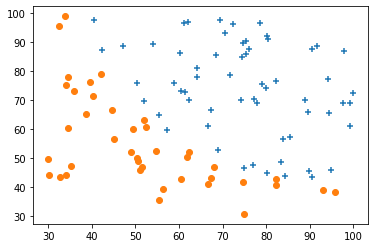

In [4]:
neg=(y==0)   # because of defining neg&pos we didnt convert y t0 2D,we use Y as a 2D of y
pos=(y==1)
plt.scatter(x[pos,0],x[pos,1],marker='+')
plt.scatter(x[neg,0],x[neg,1],marker='o')


In [5]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [6]:
def costFunc(X,y,theta,landa):
  m=y.shape[0]
  h=sigmoid(np.dot(X,theta))
  J=np.sum(-y*np.log(h)-(1-y)*np.log(1-h))/m +(landa/(2*m)) * np.sum(theta[1:]**2)
  grad1=(np.dot(X.T,h-y)/m)
  grad2=np.dot(X.T,h-y)/m + (landa/m)*theta
  grad = np.vstack((grad1[0],grad2[1:]))

  return J,grad

In [7]:
def normalize(X):       # ATTENTION: how we substract a matrix and a vector
  mu=np.mean(X,axis=0)  # every column of each matrix do (- or / or ..) with column of the other
  std=np.std(X,axis=0)
  norm=(X-mu)/std
  return norm,mu,std

In [8]:
x_norm,mu,std=normalize(x)
X=np.hstack((np.ones((x_norm.shape[0],1)),x_norm))
initial_theta=np.zeros((X.shape[1],1))
costFunc(X,Y,initial_theta,landa=0)

(0.6931471805599453, array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [9]:
def gradientDescent(X,y,theta,landa,alpha,iter):
  J_history=[]
  for i in range(iter):
    J,grad = costFunc(X,y,theta,landa)
    theta-=alpha*grad
    J_history.append(J)

  return theta,J_history

In [10]:
landa=0
alpha=0.1
iter=400
theta,J_history=gradientDescent(X,Y,initial_theta,landa,alpha,iter)

In [11]:
print(theta)
print(J_history[-1])

[[0.91957931]
 [2.31346472]
 [2.10825197]]
0.23135318871357946


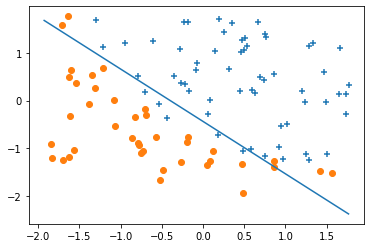

In [12]:
u=np.array([np.min(x_norm),np.max(x_norm)])
v=-(theta[0]+theta[1]*u)/theta[2]
plt.plot(u,v)
plt.scatter(x_norm[pos,0],x_norm[pos,1],marker='+')
plt.scatter(x_norm[neg,0],x_norm[neg,1],marker='o')

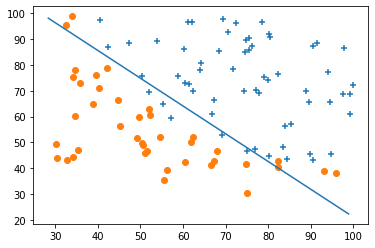

In [13]:
# without normalize
U=u*std+mu
V=v*std+mu
plt.plot(U,V)
plt.scatter(x[pos,0],x[pos,1],marker='+')
plt.scatter(x[neg,0],x[neg,1],marker='o')


In [14]:
theta.shape

(3, 1)

In [15]:
#prediction
user=np.array([45,85])
user_norm=(user-mu)/std
user_norm1=np.hstack(([1],user_norm))
prob=sigmoid(np.dot(user_norm1,theta))

In [16]:
prob

array([0.64425203])

In [17]:
#accuracy

def classifierPredict(X,theta):
  prediction=np.dot(X,theta)
  return prediction > 0

In [18]:
P=classifierPredict(X,theta)
accuracy=np.mean(P==Y)
print(accuracy)

0.9


### **PART 2**

In [19]:
dataset2=pd.read_csv('ex2data2.txt',header=None)
dataset2.keys()

Int64Index([0, 1, 2], dtype='int64')

In [20]:
x=dataset2.iloc[:,:-1].values
y=dataset2.iloc[:,-1].values
Y=y[:,np.newaxis]

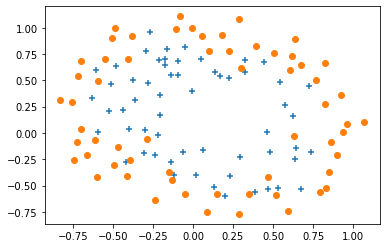

In [21]:
neg=(y==0)   # because of defining neg&pos we didnt convert y t0 2D,we use Y as a 2D of y
pos=(y==1)
plt.scatter(x[pos,0],x[pos,1],marker='+')
plt.scatter(x[neg,0],x[neg,1],marker='o')


In [22]:
def mapFeature(x1,x2,degree):
  x1=x1[:,np.newaxis] # must change to 2D
  x2=x2[:,np.newaxis]
  feature=np.zeros(x1.shape)
  for i in range(0,degree+1):   #always i+j=6
    for j in range(degree+1-i):
      feature=np.hstack((feature,(x1**i)*(x2**j)))
      
  return feature[:,1:]   # we already add a column of zeros to feature and noe we eliminate that

In [23]:
X=mapFeature(x[:,0],x[:,1],6)
initial_theta=np.zeros((X.shape[1],1))
landa=1
J,grad = costFunc(X,Y,initial_theta,landa)
print(J)

0.6931471805599454


In [24]:
landa=1
alpha=0.3
iter=800
theta,J_history=gradientDescent(X,Y,initial_theta,landa,alpha,iter)

In [25]:
J_history[-1]

0.5291382812507537

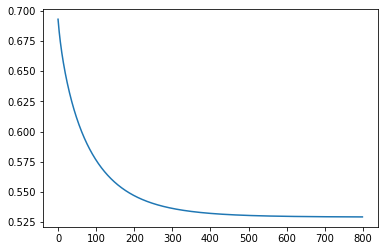

In [26]:
plt.plot(J_history)

In [27]:
P=classifierPredict(X,theta)
accuracy=np.mean(P==Y)
print(accuracy)

0.8305084745762712


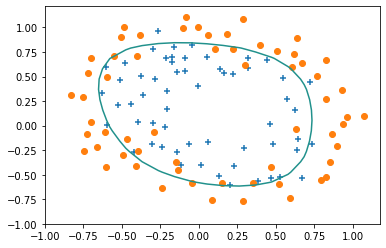

In [28]:
uu,vv=np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
XX=mapFeature(uu.ravel(),vv.ravel(),6)
Z=np.dot(XX,theta).reshape(uu.shape)
plt.contour(uu,vv,Z,0)
plt.scatter(x[pos,0],x[pos,1],marker='+')
plt.scatter(x[neg,0],x[neg,1],marker='o')

In [29]:
landa=100
alpha=0.2
iter=800
theta,J_history=gradientDescent(X,Y,initial_theta,landa,alpha,iter)

In [30]:
P=classifierPredict(X,theta)
accuracy=np.mean(P==Y)
print(accuracy)

0.6101694915254238


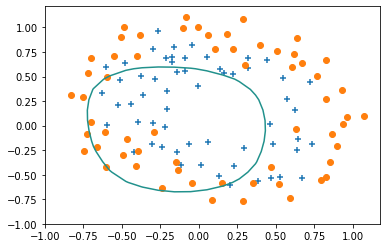

In [31]:
uu,vv=np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
XX=mapFeature(uu.ravel(),vv.ravel(),6)
Z=np.dot(XX,theta).reshape(uu.shape)
plt.contour(uu,vv,Z,0)
plt.scatter(x[pos,0],x[pos,1],marker='+')
plt.scatter(x[neg,0],x[neg,1],marker='o')

### **QUICK WAY**

In [32]:
dataset=pd.read_csv('ex2data1.txt',header=None)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
Y=y[:,np.newaxis]

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_norm=sc.fit_transform(X)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_norm,y) ## better use y 1D instead of Y 2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
classifier.coef_

array([[2.28481793, 2.09157835]])

In [36]:
classifier.intercept_

array([1.00244111])

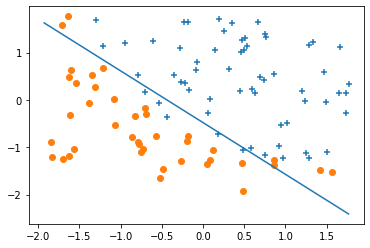

In [37]:
u=np.array([np.min(X_norm),np.max(X_norm)])
v=-(classifier.intercept_[0]+classifier.coef_[0,0]*u)/classifier.coef_[0,1]
plt.plot(u,v)
neg=(y==0)   # because of defining neg&pos we didnt convert y t0 2D,we use Y as a 2D of y
pos=(y==1)
plt.scatter(X_norm[pos,0],X_norm[pos,1],marker='+')
plt.scatter(X_norm[neg,0],X_norm[neg,1],marker='o')

In [38]:
P=classifier.predict(X_norm) 
accuracy=np.mean(P==y)   # we use y(1D) because P is 1D
print(accuracy)

0.89


In [39]:
#prediction
user=np.array([[45,85]])  # must be always 2D for prediction 
user_norm = sc.transform(user)
prediction = classifier.predict(user_norm) 
probabality = classifier.predict_proba(user_norm)
print(prediction)
print(probabality)


[1]
[[0.33395707 0.66604293]]


### **SECOUND PART**

In [40]:
dataset2=pd.read_csv('ex2data2.txt',header=None)
dataset2.keys()

Int64Index([0, 1, 2], dtype='int64')

In [41]:
X=dataset2.iloc[:,:-1].values
y=dataset2.iloc[:,-1].values
Y=y[:,np.newaxis]

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly=poly_reg.fit_transform(X)

## **landa=1**

In [43]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=1,max_iter=100)   # C=1/landa so here landa=1
classifier.fit(X_poly,y)  # better use y 1D instead of Y 2D

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
classifier.coef_

array([[-9.40316896e-05,  6.25200403e-01,  1.18110372e+00,
        -2.01998737e+00, -9.17422545e-01, -1.43161951e+00,
         1.24007673e-01, -3.65545995e-01, -3.57235803e-01,
        -1.75177398e-01, -1.45813451e+00, -5.09079430e-02,
        -6.15531333e-01, -2.74684592e-01, -1.19285084e+00,
        -2.42159297e-01, -2.06009268e-01, -4.46834189e-02,
        -2.77786348e-01, -2.95378201e-01, -4.56358841e-01,
        -1.04313960e+00,  2.78215032e-02, -2.92419721e-01,
         1.56135368e-02, -3.27375607e-01, -1.43860298e-01,
        -9.24641743e-01]])

In [45]:
classifier.intercept_

array([1.27281727])

In [46]:
P=classifier.predict(X_poly)
accuracy=np.mean(P==y)
print(accuracy)

0.8305084745762712


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


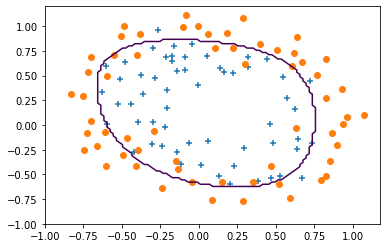

In [47]:
uu,vv=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1.2,100))
XX=np.c_[uu.ravel(),vv.ravel()]
XX_poly=poly_reg.fit_transform(XX)
Z=classifier.predict(XX_poly).reshape(uu.shape)
plt.contour(uu,vv,Z,0)
neg=(y==0)   # because of defining neg&pos we didnt convert y t0 2D,we use Y as a 2D of y
pos=(y==1)
plt.scatter(X[pos,0],X[pos,1],marker='+')
plt.scatter(X[neg,0],X[neg,1],marker='o')

# **landa~0**

In [48]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(C=10000,max_iter=4000)   # C=1/landa, for higher c we need higher max_iter
classifier.fit(X_poly,y)  # better use y 1D instead of Y 2D

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
P=classifier.predict(X_poly)
accuracy=np.mean(P==y)
print(accuracy)

0.8728813559322034


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


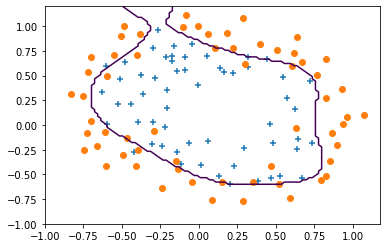

In [50]:
uu,vv=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1.2,100))
XX=np.c_[uu.ravel(),vv.ravel()]
XX_poly=poly_reg.fit_transform(XX)
Z=classifier.predict(XX_poly).reshape(uu.shape)
plt.contour(uu,vv,Z,0)
neg=(y==0)   # because of defining neg&pos we didnt convert y t0 2D,we use Y as a 2D of y
pos=(y==1)
plt.scatter(X[pos,0],X[pos,1],marker='+')
plt.scatter(X[neg,0],X[neg,1],marker='o')